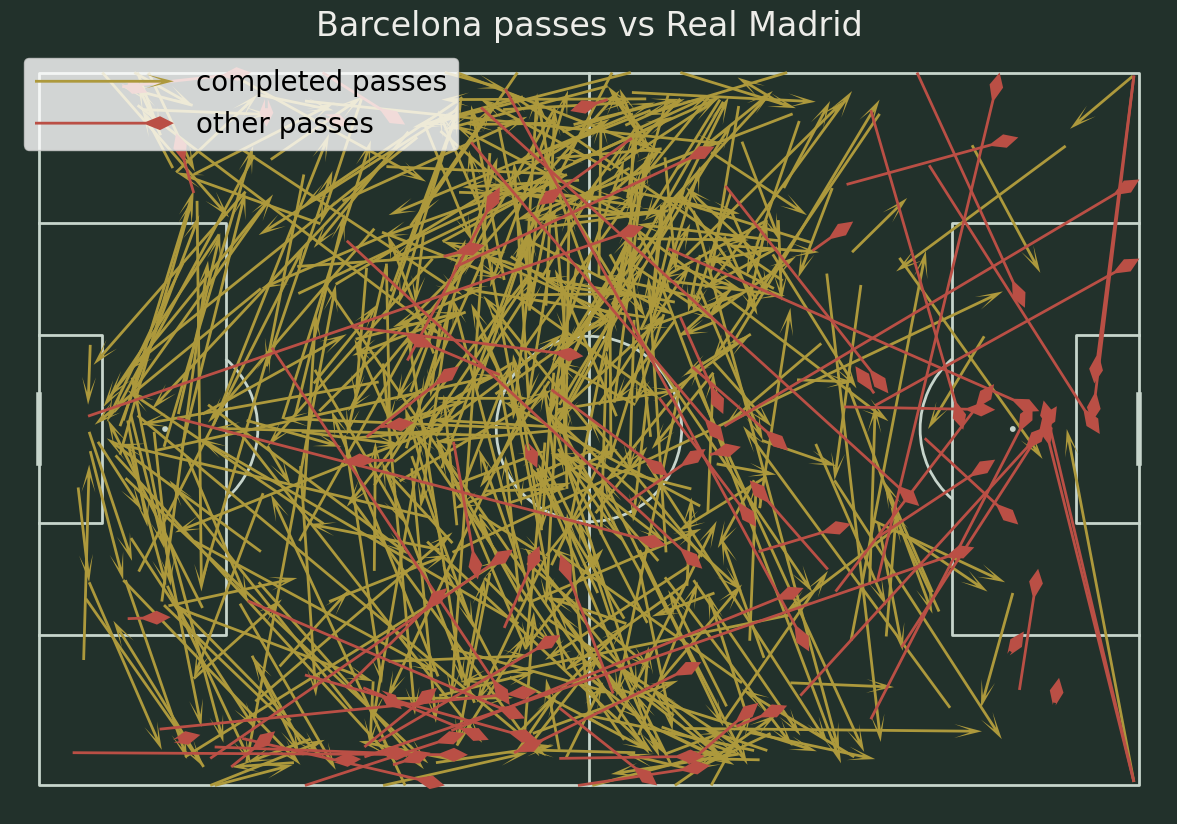

In [209]:
import json
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from main_data import arrows_pass_plot

with open('rm_barca_whoscored.json', 'r') as file:
    data = json.load(file)


home_team_success_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['home']['teamId']
    and x['outcomeType']['value'] == 1
), data['matchCentreData']['events']))

home_team_other_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['home']['teamId']
    and x['outcomeType']['value'] != 1
), data['matchCentreData']['events']))

arrows_pass_plot(success_passes=home_team_success_passes,
                 other_passes=home_team_other_passes, first_team='Barcelona', second_team='Real Madrid')

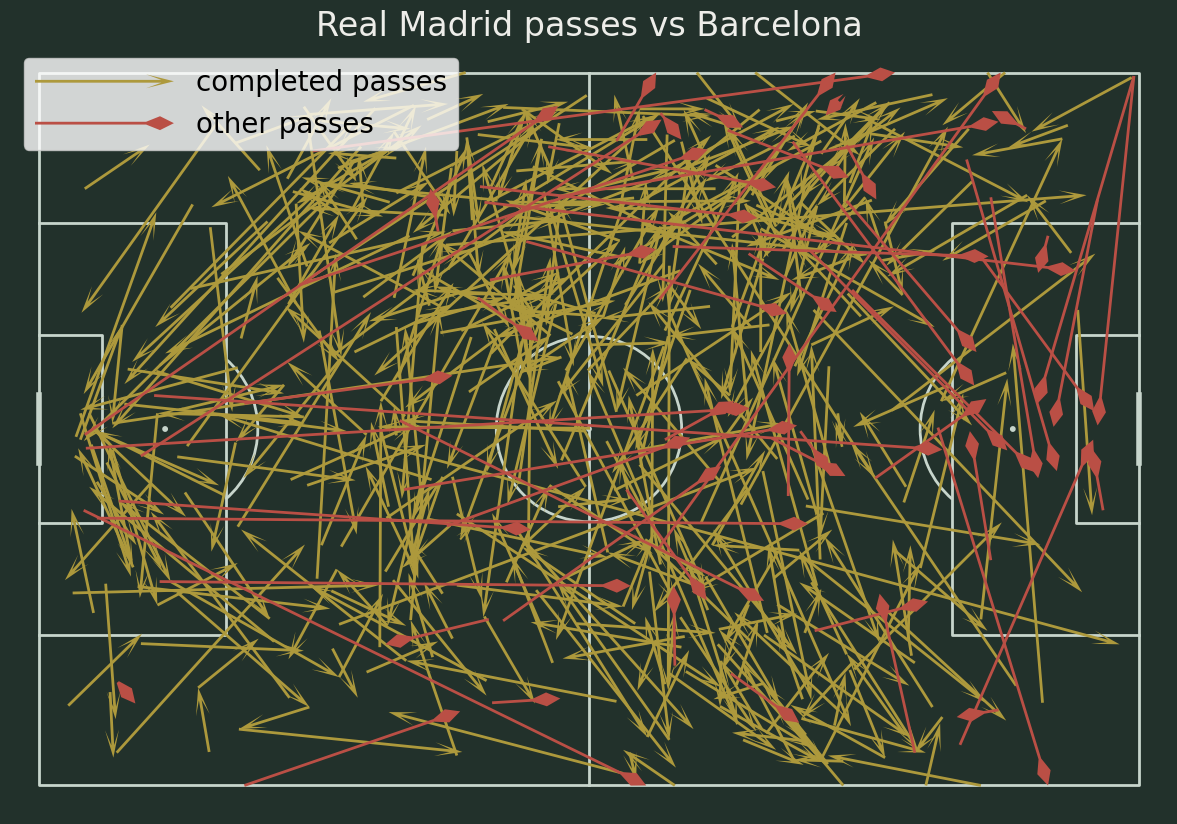

In [210]:
away_team_success_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['away']['teamId']
    and x['outcomeType']['value'] == 1
), data['matchCentreData']['events']))

away_team_other_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['away']['teamId']
    and x['outcomeType']['value'] != 1
), data['matchCentreData']['events']))

arrows_pass_plot(success_passes=away_team_success_passes,
                 other_passes=away_team_other_passes, first_team='Real Madrid', second_team='Barcelona')

In [205]:
from mplsoccer.pitch import Pitch


def flow_pass_plot_columns(first_team_passes: list, second_team_passes: list, first_team: str, second_team: str):
    pitch = Pitch(pitch_type='statsbomb',  line_zorder=2,
                  line_color='#c7d5cc', pitch_color='#22312b',)

    bins = (6, 4)
    fig, axs = pitch.grid(ncols=2,  endnote_height=0.03, endnote_space=0, axis=False,
                          title_height=0.08, grid_height=0.84)
    fig.set_facecolor('#22312b')

    def get_team_passes_data(data: list):
        result = []
        x = ()
        y = ()
        end_X = ()
        end_Y = ()
        for pass_data in data:
            x += (pass_data['x'],)
            y += (pass_data['y'],)
            end_X += (pass_data['endX'],)
            end_Y += (pass_data['endY'],)
        result.append(x)
        result.append(y)
        result.append(end_X)
        result.append(end_Y)
        return result

    team_passes_data = get_team_passes_data(first_team_passes)
    second_team_passes_data = get_team_passes_data(second_team_passes)
    passes = [team_passes_data, second_team_passes_data]

    for idx, ax in enumerate(axs['pitch'].flat):
        bs_heatmap = pitch.bin_statistic(
            passes[idx][0], passes[idx][1], statistic='count', bins=bins)
        hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
        fm = pitch.flow(passes[idx][0],  passes[idx][1],  passes[idx][2],  passes[idx][3],
                        color='black', arrow_type='same',
                        arrow_length=5, bins=bins, ax=ax)
        ax_title = ax.set_title(
            f'{second_team if idx else first_team } pass flow map vs {first_team if idx else second_team}', fontsize=24, pad=20, color='#edede9')

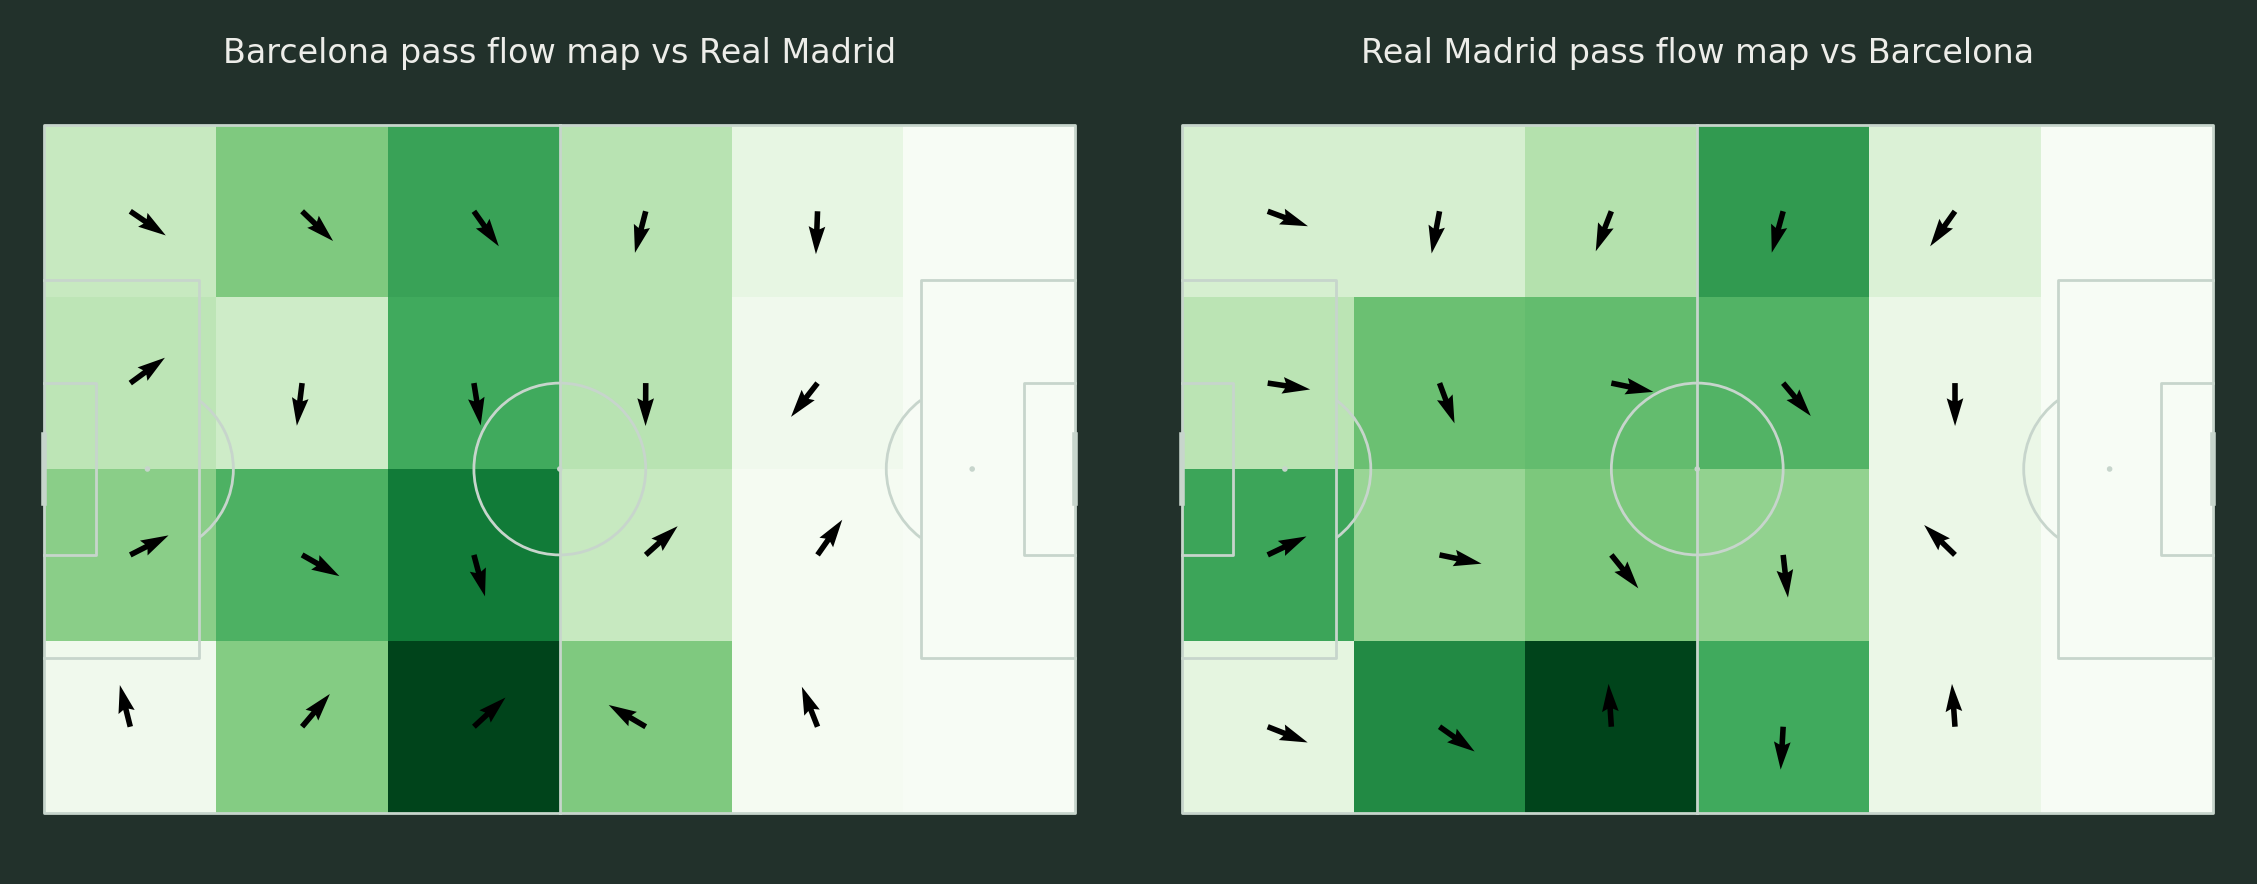

In [211]:
home_team_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['home']['teamId']
), data['matchCentreData']['events']))
away_team_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['away']['teamId']
), data['matchCentreData']['events']))


flow_pass_plot_columns(first_team_passes=home_team_passes, second_team_passes=away_team_passes, first_team="Barcelona",
                       second_team='Real Madrid')